In [14]:
import numpy as np

In [15]:
import tensorflow as tf

In [16]:
import matplotlib.pyplot as plt

In [17]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

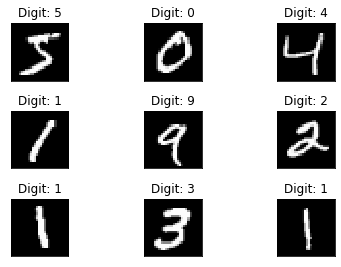

In [19]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])


Text(0.5, 1.0, 'Pixel Value Distribution')

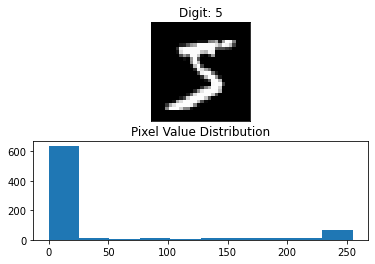

In [20]:
#distributionj of graph
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")


In [21]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [22]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [23]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [24]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [9]:
import keras

In [25]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512,kernel_initializer = tf.keras.initializers.HeNormal(),input_shape=(784,)))
model.add(Activation('relu'))                            
#model.add(Dropout(0.2))

model.add(Dense(512,kernel_initializer = tf.keras.initializers.HeNormal()))
model.add(Activation('relu'))
#model.add(Dropout(0.2))

model.add(Dense(10,kernel_initializer = tf.keras.initializers.GlorotNormal()))
model.add(Activation('softmax'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

In [27]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [28]:
10000/128

78.125

In [28]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test)) 

Epoch 1/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3962 - accuracy: 0.8815 - val_loss: 0.0961 - val_accuracy: 0.9714
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0788 - accuracy: 0.9761 - val_loss: 0.0831 - val_accuracy: 0.9739
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0456 - accuracy: 0.9855 - val_loss: 0.0746 - val_accuracy: 0.9765
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0342 - accuracy: 0.9889 - val_loss: 0.0723 - val_accuracy: 0.9786
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0234 - accuracy: 0.9921 - val_loss: 0.0677 - val_accuracy: 0.9823
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0185 - accuracy: 0.9938 - val_loss: 0.0768 - val_accuracy: 0.9785
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0179 - accuracy: 0.9935 - val_loss: 0.0748 - val_accuracy: 0.9793

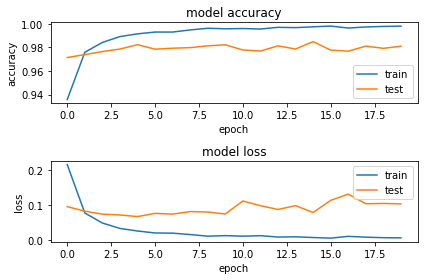

In [29]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [18]:
10000/32

312.5

In [30]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.1040 - accuracy: 0.9810
Test Loss 0.10401520133018494
Test Accuracy 0.9810000061988831


In [31]:
X_test[0].reshape(-1,1).shape

(784, 1)

In [32]:
a = model.predict(X_test[0].reshape(1,-1))

In [33]:
a

array([[1.1187470e-15, 1.1066623e-12, 2.3868404e-11, 8.0085396e-09,
        2.0392080e-17, 1.7601377e-14, 5.2127857e-17, 1.0000000e+00,
        1.0280666e-14, 2.0359459e-11]], dtype=float32)

In [34]:
np.argmax(a)

7

In [35]:
max(a)

array([1.1187470e-15, 1.1066623e-12, 2.3868404e-11, 8.0085396e-09,
       2.0392080e-17, 1.7601377e-14, 5.2127857e-17, 1.0000000e+00,
       1.0280666e-14, 2.0359459e-11], dtype=float32)

In [36]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)